# Coursework 1: Image Filtering

In this coursework we will explore some basic image filters used in computer vision. The corresponding lectures are Lectures 3 and 4 on image filtering and edge detection.

This coursework includes both coding questions as well as written ones. Please upload the notebook, which contains your code, results and answers as a pdf file onto Cate.

Dependencies: If you work on a college computer in the Computing Lab, where Ubuntu 18.04 is installed by default, you can use the following virtual environment for your work, where relevant Python packages are already installed.

`source /vol/bitbucket/wbai/virt/computer_vision_ubuntu18.04/bin/activate`

Alternatively, you can use pip, pip3 or anaconda etc to install Python packages.

**Note:** please read the both the text and code comment in this notebook to get an idea what you are supposed to implement.

In [2]:
# Import libaries
import imageio
import numpy as np
import matplotlib.pyplot as plt
import noisy
import scipy
import scipy.signal
import math
import time

# 1. Moving average filter (20 points)

**Task:** Read a specific input image and add noise to the image. Design a moving average filter of kernel size 3x3, 5x5 and 9x9 respectively. Display the filtering results and comment on the results.

Please design the filter by yourself. Then, 2D image filtering can be performed using the function `scipy.signal.convolve2d()`.

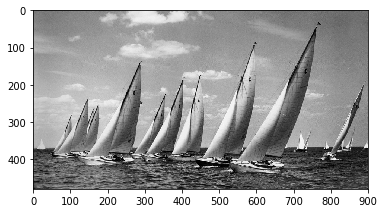

In [3]:
# Read the image
image = imageio.imread('boat.png')
plt.imshow(image, cmap='gray')

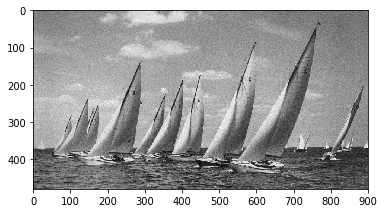

In [4]:
# Corrupt the image with Gaussian noise
image_noisy = noisy.noisy(image, 'gaussian')
plt.imshow(image_noisy, cmap='gray')

**Note:** from now on, please use the noisy image as the input for the filters.

## 1.1 Filter the noisy image with a 3x3 moving average filter (5 points)

[[0.1111111111111111, 0.1111111111111111, 0.1111111111111111], [0.1111111111111111, 0.1111111111111111, 0.1111111111111111], [0.1111111111111111, 0.1111111111111111, 0.1111111111111111]]


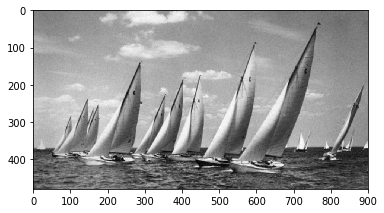

In [5]:
# Design the filter h
h=[[1/9]*3]*3

# Print the filter
print(h)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h, mode='same')
plt.imshow(image_filtered, cmap='gray')

## 1.2 Filter the noisy image with a 5x5 moving average filter (5 points)

[[0.04, 0.04, 0.04, 0.04, 0.04], [0.04, 0.04, 0.04, 0.04, 0.04], [0.04, 0.04, 0.04, 0.04, 0.04], [0.04, 0.04, 0.04, 0.04, 0.04], [0.04, 0.04, 0.04, 0.04, 0.04]]


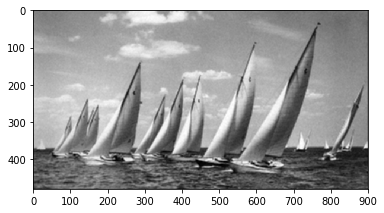

In [6]:
# Design the filter h
h=[[1/25]*5]*5

# Print the filter
print(h)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h, mode='same')
plt.imshow(image_filtered, cmap='gray')

## 1.3 Filter the noisy image with a 9x9 moving average filter (5 points)

[[0.012345679012345678, 0.012345679012345678, 0.012345679012345678, 0.012345679012345678, 0.012345679012345678, 0.012345679012345678, 0.012345679012345678, 0.012345679012345678, 0.012345679012345678], [0.012345679012345678, 0.012345679012345678, 0.012345679012345678, 0.012345679012345678, 0.012345679012345678, 0.012345679012345678, 0.012345679012345678, 0.012345679012345678, 0.012345679012345678], [0.012345679012345678, 0.012345679012345678, 0.012345679012345678, 0.012345679012345678, 0.012345679012345678, 0.012345679012345678, 0.012345679012345678, 0.012345679012345678, 0.012345679012345678], [0.012345679012345678, 0.012345679012345678, 0.012345679012345678, 0.012345679012345678, 0.012345679012345678, 0.012345679012345678, 0.012345679012345678, 0.012345679012345678, 0.012345679012345678], [0.012345679012345678, 0.012345679012345678, 0.012345679012345678, 0.012345679012345678, 0.012345679012345678, 0.012345679012345678, 0.012345679012345678, 0.012345679012345678, 0.012345679012345678],

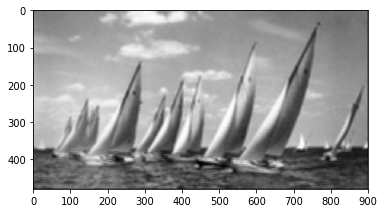

In [7]:
# Design the filter h
h=[[1/81]*9]*9

# Print the filter
print(h)

# Convolve the corrupted image with h using scipy.signal.convolve2d function
image_filtered = scipy.signal.convolve2d(image_noisy, h, mode='same')
plt.imshow(image_filtered, cmap='gray')

## 1.4 Comment on the filtering results when different window sizes are used (5 points)

The image corrupted with Gaussian noise has many white noisy points. The image became very blurred after filtering with a 3*3 moving average filter. However, through the 5*5 moving average filter and the 9*9 moving average filter, the image become blurrier than the first filtered image, it seems to remove too much information including the noise and original pixels. 

# 2. Edge detection (35 points)

**Task:** Perform edge detection using Sobel filters, as well as Gaussian + Sobel filters. Display the Sobel magnitude images and comment.

## 2.1 Implement 3x3 Sobel filters and convolve with the noisy image (5 points)

[[1, 0, -1], [2, 0, -2], [1, 0, -1]]
[[1, 2, 1], [0, 0, 0], [-1, -2, -1]]


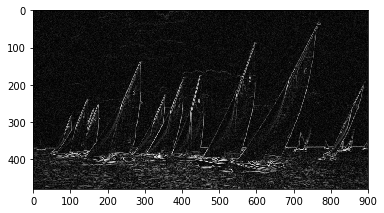

In [8]:
# Design the Sobel filters
h_sobel_x = [[1,0,-1],[2,0,-2],[1,0,-1]]
h_sobel_y = [[1,2,1],[0,0,0],[-1,-2,-1]]

# Print the filters
print(h_sobel_x)
print(h_sobel_y)

# Sobel filtering
sobel_x = scipy.signal.convolve2d(image_noisy, h_sobel_x, mode='same')
sobel_y = scipy.signal.convolve2d(image_noisy, h_sobel_y, mode='same')

# Calculate the gradient magnitude
sobel_mag = np.sqrt(sobel_x * sobel_x + sobel_y * sobel_y)

# Display the magnitude
plt.imshow(sobel_mag, cmap='gray')

## 2.2 Design a 2D Gaussian filter (5 points)

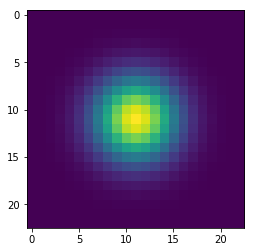

In [9]:
# Design the Gaussian filter
def gaussian_filter_2d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 2D array for the Gaussian kernel
    
    # The filter radius is 3.5 times sigma
    rad = int(math.ceil(3.5 * sigma))
    sz = 2 * rad + 1
    h=[]
    for i in range(sz):
        h.append([])
        for j in range(sz):
            x = math.exp((-(i-rad)**2-(j-rad)**2)/(2*sigma**2))/(2*math.pi*sigma**2)
            h[i].append(x)
#         print(h)
    return h

# Display the Gaussian filter when sigma = 3 pixel
sigma = 3
h = gaussian_filter_2d(sigma)
plt.imshow(h)

## 2.3 Perform Gaussian smoothing ($\sigma$ = 3 pixels) before applying the Sobel filters (5 points)

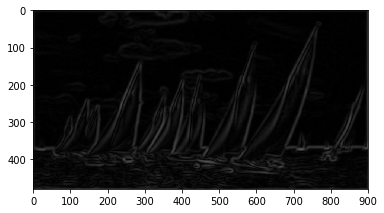

In [10]:
# Perform Gaussian smoothing before Sobel filtering
sigma = 3
h = gaussian_filter_2d(sigma)
image_smoothed = scipy.signal.convolve2d(image_noisy, h, mode='same')

# Sobel filtering
sobel_x = scipy.signal.convolve2d(image_smoothed, h_sobel_x, mode='same')
sobel_y = scipy.signal.convolve2d(image_smoothed, h_sobel_y, mode='same')

# Calculate the gradient magnitude
sobel_mag = np.sqrt(sobel_x * sobel_x + sobel_y * sobel_y)

# Display the magnitude
plt.imshow(sobel_mag, cmap='gray')

## 2.4 Perform Gaussian smoothing ($\sigma$ = 7 pixels) before applying the Sobel filters. Evaluate the computational time for Gaussian smoothing. (5 points)

It takes 2.743310 seconds for performing Gaussian smoothing.


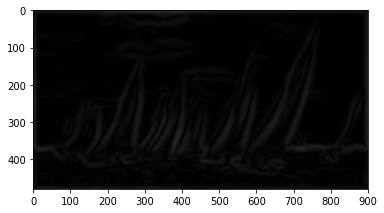

In [12]:
# Create the Gaussian filter
sigma = 7
h = gaussian_filter_2d(sigma)

# Perform Gaussian smoothing
start = time.time()
image_smoothed = scipy.signal.convolve2d(image_noisy, h, mode='same')
duration = time.time() - start
print('It takes {0:.6f} seconds for performing Gaussian smoothing.'.format(duration))

# Sobel filtering
sobel_x = scipy.signal.convolve2d(image_smoothed, h_sobel_x, mode='same')
sobel_y = scipy.signal.convolve2d(image_smoothed, h_sobel_y, mode='same')

# Calculate the gradient magnitude
sobel_mag = np.sqrt(sobel_x * sobel_x + sobel_y * sobel_y)

# Display the magnitude
plt.imshow(sobel_mag, cmap='gray')

## 2.5 Design 1D Gaussian filters along x-axis and y-axis respectively. (5 points)

[9.684491216181098e-05, 0.0001596702666402633, 0.0002579337301466655, 0.000408252708196445, 0.0006331212017054296, 0.0009620142107471777, 0.0014322306547697805, 0.0020892061217045736, 0.0029859770251128826, 0.004181465147022968, 0.005737297205843301, 0.007712995216169724, 0.010159576932727638, 0.013111881994872577, 0.016580258143722396, 0.020542551821266894, 0.024937582040200024, 0.029661365445028648, 0.03456724635987763, 0.039470740790642965, 0.04415934440272378, 0.04840684796525537, 0.05199096024506909, 0.0547123942777446, 0.056413162847180155, 0.05699175434306182, 0.056413162847180155, 0.0547123942777446, 0.05199096024506909, 0.04840684796525537, 0.04415934440272378, 0.039470740790642965, 0.03456724635987763, 0.029661365445028648, 0.024937582040200024, 0.020542551821266894, 0.016580258143722396, 0.013111881994872577, 0.010159576932727638, 0.007712995216169724, 0.005737297205843301, 0.004181465147022968, 0.0029859770251128826, 0.0020892061217045736, 0.0014322306547697805, 0.000962014

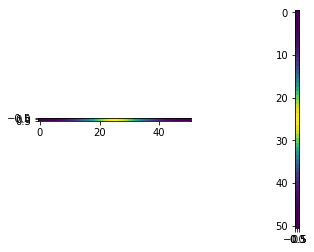

In [13]:
# Design the Gaussian filter
def gaussian_filter_1d(sigma):
    # sigma: the parameter sigma in the Gaussian kernel (unit: pixel)
    #
    # return: a 1D array for the Gaussian kernel
    
    # The filter radius is 3.5 times sigma
    rad = int(math.ceil(3.5 * sigma))
    sz = 2 * rad + 1
    h = []
    for i in range(-rad,rad+1):
        x = math.exp(-(i**2)/(2*sigma**2))/(math.sqrt(2*math.pi)*sigma)
        h.append(x)
    print(h)
    return h
# Display the Gaussian filters when sigma = 7 pixel
sigma = 7

# The Gaussian filter along x-axis. Its shape is (1, sz).
h_x = gaussian_filter_1d(sigma)
h_x = np.expand_dims(h_x, axis=0)

# The Gaussian filter along y-axis. Its shape is (sz, 1).
h_y = gaussian_filter_1d(sigma)
h_y = np.expand_dims(h_y, axis=-1)
# print(h_x)

# Display the filters
plt.subplot(1, 2, 1)
plt.imshow(h_x)
plt.subplot(1, 2, 2)
plt.imshow(h_y)

## 2.6 Perform Gaussian smoothing (sigma = 7 pixels) as two separable filters, then apply the Sobel filters. Evaluate the computational time for separable Gaussian filtering. (5 points)

It takes 0.169265 seconds for performing Gaussian smoothing.


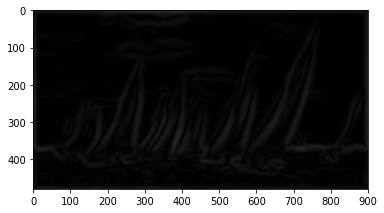

In [14]:
# Perform separable Gaussian smoothing before Sobel filtering
start = time.time()
image_smoothed = scipy.signal.convolve2d(image_noisy, h_x, mode='same')
image_smoothed = scipy.signal.convolve2d(image_smoothed, h_y, mode='same')
duration = time.time() - start
print('It takes {0:.6f} seconds for performing Gaussian smoothing.'.format(duration))

# Sobel filtering
sobel_x = scipy.signal.convolve2d(image_smoothed, h_sobel_x, mode='same')
sobel_y = scipy.signal.convolve2d(image_smoothed, h_sobel_y, mode='same')

# Calculate the gradient magnitude
sobel_mag = np.sqrt(sobel_x * sobel_x + sobel_y * sobel_y)

# Display the magnitude
plt.imshow(sobel_mag, cmap='gray')

## 2.7 Comment on the filtering results (5 points)

Gaussian smoothing helps eliminate noise. Applying the Sobel filters we can quantitively detect edges. However, using two separable filters in x-axis and y-axis can reduce the time for performing Gaussian smoothing(0.169s) compared to a squire filter which takes 2.743 seconds 

# 3. Laplacian filter (15 points)

**Task:** Perform Laplacian filtering and Laplacian of Gaussian filtering. Display the results and comment.

## 3.1 Implement a 3x3 Laplacian filter (5 points)

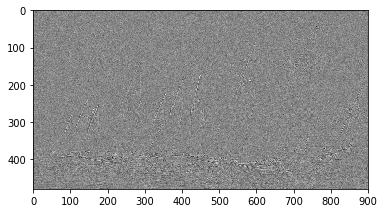

In [15]:
# Design the filter
h = [[0,1,0],[1,-4,1],[0,1,0]]

# Laplacian filtering
lap = scipy.signal.convolve2d(image_noisy, h, mode='same')

# Display the results
plt.imshow(lap, cmap='gray')

## 3.2 Implement the Laplacian of Gaussian filter ($\sigma$ = 3 pixel) (5 points)

[0.0001600902172069401, 0.0005140929987637022, 0.0014772828039793357, 0.0037986620079324806, 0.008740629697903164, 0.017996988837729353, 0.033159046264249564, 0.054670024891997876, 0.08065690817304778, 0.10648266850745075, 0.12579440923099772, 0.1329807601338109, 0.12579440923099772, 0.10648266850745075, 0.08065690817304778, 0.054670024891997876, 0.033159046264249564, 0.017996988837729353, 0.008740629697903164, 0.0037986620079324806, 0.0014772828039793357, 0.0005140929987637022, 0.0001600902172069401]
[0.0001600902172069401, 0.0005140929987637022, 0.0014772828039793357, 0.0037986620079324806, 0.008740629697903164, 0.017996988837729353, 0.033159046264249564, 0.054670024891997876, 0.08065690817304778, 0.10648266850745075, 0.12579440923099772, 0.1329807601338109, 0.12579440923099772, 0.10648266850745075, 0.08065690817304778, 0.054670024891997876, 0.033159046264249564, 0.017996988837729353, 0.008740629697903164, 0.0037986620079324806, 0.0014772828039793357, 0.0005140929987637022, 0.0001600

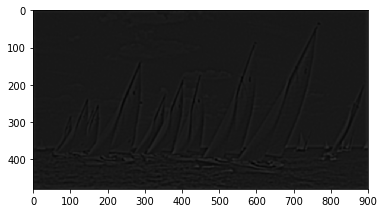

In [19]:
# Design the Gaussian filter
sigma = 3

# The Gaussian filter along x-axis
h_x = gaussian_filter_1d(sigma)
h_x = np.expand_dims(h_x, axis=0)


# The Gaussian filter along y-axis
h_y = gaussian_filter_1d(sigma)
h_y = np.expand_dims(h_y, axis=-1)

# Gaussian smoothing
image_smoothed = scipy.signal.convolve2d(image_noisy, h_x, mode='same')
image_smoothed = scipy.signal.convolve2d(image_smoothed, h_y, mode='same')

# Design the Laplacian filter
h = [[0,-1,0],[-1,4,-1],[0,-1,0]]
# h=[]
# sz= 23
# rad = sz//2
# for x in range(sz):
#     h.append([])
#     for y in range(sz):
#         t=(-(x-rad)**2-(y-rad)**2)/(2*sigma**2)
#         lxy=math.exp(t)/(-math.pi*sigma**4)*(1+t)
#         h[x].append(lxy)


# Laplacian filtering
lap = scipy.signal.convolve2d(image_smoothed, h, mode='same')
# lap1 = scipy.signal.convolve2d(image_noisy, h, mode='same')
# plt.subplot(1, 2, 1)
plt.imshow(lap, cmap='gray')
# plt.subplot(1, 2, 2)
# plt.imshow(lap1, cmap='gray')


## 3.3 Comments on the filtering results (5 points)

Using the lipped and negative Laplacian filter after performing Gaussian smoothing, we can get a clear image of detected edges. The black background and white edges are shown in the result, while it seems to emerge some slight difference between using a continuous second derivative of LoG and using Laplacian filter after performing Gaussian smoothing.

# 4. Survey: How long does it take you to complete the coursework?

2 hours